In [20]:
from faker import Faker
import random
import pandas as pd
from random import randrange
from datetime import datetime
import numpy as np

In [21]:
nr_of_trekkers = 10000
# time-stamp
# email, name, height, weight, age, gender, city, locality
# languages, college
# working profession, have you gone trekking
# preference of trek days
# no. of previous treks
# list of treks done
# difficulty of trek
# preferred location of trek
# food preferences

fake = Faker('de_DE')

trekkers = []

In [22]:
# generate a list of ages between 18 and 80 years old, with 1000 entries following a normal distribution
ages = np.random.normal(30, 10, nr_of_trekkers).astype(int)
# generate a list of number of previous treks between 0 and 10, with 1000 entries following a normal distribution
previous_treks = np.random.normal(3, 1, nr_of_trekkers).astype(int)


localities = {
    "Pune":  [
        "Kothrud", "Nal Stop", "Aundh", "Pimpri", "Shivaji Nagar"
    ], # list of localities random 
    "Mumbai": [
        "Bandra", "Andheri", "Borivali", "Ghatkopar", "Kandivali"
    ],
    "Nashik": [
        "Satpur", "Ambad", "Panchavati", "Sadar", "Gangapur"
    ],
    "Kolhapur": [
        "Kagal", "Tarabai Park", "Kasaba Bawada", "D Ward", "Gadhinglaj"
    ],
    "Nagpur": [
        "Kamptee", "Bank Colony", "Kalameshwar", "Reshim Bagh", "Koradi Road"
    ]
}

# list of bias for each city 
#  pune 50% , mumbai 20%, nashik 10%, kolhapur 10%, nagpur 10%
city_bias = [0.5, 0.2, 0.1, 0.1, 0.1]





for customers_id in range(nr_of_trekkers):
    # creating time-stamp:
    d1 = datetime.strptime(f'1/1/2021', '%m/%d/%Y')
    d2 = datetime.strptime(f'12/31/2022', '%m/%d/%Y')
    transaction_date = fake.date_between(d1, d2)
    # create email:
    email = fake.ascii_email()
    # create trekkers name:
    name = fake.name()

    # create height:
    # height should be between 150 and 200 cm with a skewed towards 160cm
    height = np.random.normal(160, 10, 1).astype(int)
    # create weight:
    # weight should be between 50 and 100 kg with a skewed towards 70kg
    weight = np.random.normal(70, 10, 1).astype(int)



    # create age:
    age = ages[customers_id]
    if age < 10:
        age = 30-age
    
    # create gender:
    # 60% male, 40% female

    gender = np.random.choice(["Male","Female"], p=[0.6, 0.4])

    # create city:
    city = np.random.choice(["Pune", "Mumbai", "Nashik", "Kolhapur", "Nagpur"], p=city_bias)
    # create locality:

    locality = np.random.choice(localities[city])

    # choose max 3 min 1 languages
    # 80% Marathi, 50% Hindi, 40% English, 15% other
    languages = np.random.choice(["Marathi", "Hindi", "English", "Other"], p=[0.55, 0.25, 0.1, 0.1], size=random.randint(1,3), replace=False)
    # create college:
    college = np.random.choice(["MIT-WPU", "SPPU", "MIT-ADT", "PCCOE", "PICT", "VIT"])
    # create profession:
    # 80% student, 10% working, 10% unemployed
    profession = np.random.choice(["Student", "Working", "Unemployed"], p=[0.8, 0.1, 0.1])
    # create trekking experience:
    # 70% yes, 30% no
    # create YES/NO:
    # create preference of trek days:
    gone_trekking = np.random.choice(["Y", "N"], p=[0.7, 0.3])
    if gone_trekking == "Y":
        num_treks = previous_treks[customers_id]
    else:
        num_treks = 0

    # preference of trek days monday to sunday, min 1 max 7
    preferred_days = np.random.choice(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], size=np.random.randint(1, 7), p=[0.1, 0.01, 0.03, 0.01, 0.2, 0.3, 0.35], replace=False)
    # list of treks done:
       # prev_treks = random.choice()
    # difficulty of treks: 

    # 34% easy, 40% medium 26% hard
    difficulty_trek = np.random.choice(["Beginner", "Intermediate", "Experienced"])
    # preferred location of treks:

    # food choice:
    food_choice = np.random.choice(["Non-Veg", "Veg", "Vegan"])


    trekkers.append([email, name, height[0], weight[0],age, gender, city, locality, languages, college, profession,
                     gone_trekking, preferred_days, num_treks, difficulty_trek])




In [23]:

trekkers_df = pd.DataFrame(trekkers, columns=['Email-ID', 'Name', 'Height', 'Weight', 'Age', 'Gender', 'City', 'Locality',
                                               'Languages', 'college', 'Profession', 'Have you gone Trekking', 'Preferred Days',
                                               'Number of Treks', 'Difficulty of Trek'])

pd.pandas.set_option('display.max_columns', None)
print(trekkers_df)

                      Email-ID                         Name  Height  Weight  \
0         carminedehmel@web.de              Ilonka Pergande     163      57   
1         vera47@paertzelt.net          Bozena Radisch-Henk     142      72   
2     wloeffler@schweitzer.org               Konrad Fischer     156      62   
3      henning44@gehringer.com           Gerwin Schenk B.A.     167      84   
4       budigmartin@haering.de  Ing. Deborah Schäfer B.Eng.     153      57   
...                        ...                          ...     ...     ...   
9995         sabri11@sontag.de           Reinhart Gehringer     162      60   
9996         sandy10@gmail.com     Univ.Prof. Heide Hornich     154      65   
9997       annemie12@gmail.com   Dipl.-Ing. Elwira Schottin     151      83   
9998       helmuth80@stahr.com               Gitta Heydrich     155      79   
9999    kabusjohann@hotmail.de          Dino Sager-Bohnbach     164      59   

      Age  Gender      City       Locality         

<AxesSubplot:>

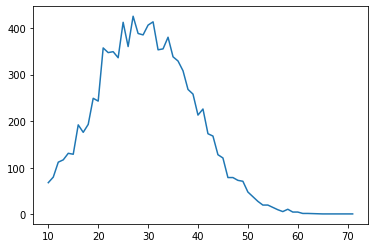

In [24]:
trekkers_df["Age"].value_counts().sort_index().plot(kind="line")

In [25]:
trekkers_df.describe()

,Height,Weight,Age,Number of Treks
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,159.47590,69.478800,29.689800,1.757600
std,10.07733,9.971494,9.418442,1.445009
min,122.00000,29.000000,10.000000,0.000000
25%,153.00000,63.000000,23.000000,0.000000
50%,160.00000,70.000000,29.000000,2.000000
75%,166.00000,76.000000,36.000000,3.000000
max,198.00000,106.000000,71.000000,6.000000


In [26]:
trekkers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Email-ID                10000 non-null  object
 1   Name                    10000 non-null  object
 2   Height                  10000 non-null  int64 
 3   Weight                  10000 non-null  int64 
 4   Age                     10000 non-null  int64 
 5   Gender                  10000 non-null  object
 6   City                    10000 non-null  object
 7   Locality                10000 non-null  object
 8   Languages               10000 non-null  object
 9   college                 10000 non-null  object
 10  Profession              10000 non-null  object
 11  Have you gone Trekking  10000 non-null  object
 12  Preferred Days          10000 non-null  object
 13  Number of Treks         10000 non-null  int64 
 14  Difficulty of Trek      10000 non-null  object
dtypes: 

In [27]:
trekkers_df.to_csv('../Data/trekkers_df_with_bias.csv', index=False)

In [28]:
trekkers_df = pd.read_csv('../Data/trekkers_df_with_bias.csv')
trekkers_df

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek
0,carminedehmel@web.de,Ilonka Pergande,163,57,23,Male,Pune,Pimpri,['Marathi' 'Hindi' 'English'],VIT,Unemployed,Y,['Sunday' 'Saturday' 'Monday' 'Friday' 'Wednes...,4,Beginner
1,vera47@paertzelt.net,Bozena Radisch-Henk,142,72,22,Male,Pune,Nal Stop,['English' 'Other' 'Marathi'],VIT,Student,Y,['Saturday'],3,Intermediate
2,wloeffler@schweitzer.org,Konrad Fischer,156,62,38,Female,Pune,Aundh,['Marathi' 'Hindi' 'Other'],PICT,Student,Y,['Sunday' 'Saturday' 'Friday'],3,Beginner
3,henning44@gehringer.com,Gerwin Schenk B.A.,167,84,38,Female,Mumbai,Borivali,['Marathi' 'Hindi' 'Other'],MIT-ADT,Student,N,['Sunday' 'Saturday' 'Monday' 'Friday'],0,Intermediate
4,budigmartin@haering.de,Ing. Deborah Schäfer B.Eng.,153,57,22,Male,Pune,Pimpri,['Hindi'],MIT-WPU,Student,N,['Friday' 'Saturday' 'Monday' 'Sunday' 'Wednes...,0,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,sabri11@sontag.de,Reinhart Gehringer,162,60,31,Male,Pune,Kothrud,['Marathi'],VIT,Student,Y,['Sunday' 'Friday' 'Monday'],2,Experienced
9996,sandy10@gmail.com,Univ.Prof. Heide Hornich,154,65,25,Male,Kolhapur,Kasaba Bawada,['English'],PCCOE,Student,N,['Friday'],0,Experienced
9997,annemie12@gmail.com,Dipl.-Ing. Elwira Schottin,151,83,15,Male,Pune,Kothrud,['Marathi' 'Hindi' 'Other'],SPPU,Student,Y,['Saturday' 'Friday' 'Sunday' 'Thursday'],4,Experienced
9998,helmuth80@stahr.com,Gitta Heydrich,155,79,60,Female,Pune,Kothrud,['Hindi'],PCCOE,Unemployed,Y,['Saturday'],1,Intermediate
